In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Saving panda.jpg to panda (3).jpg


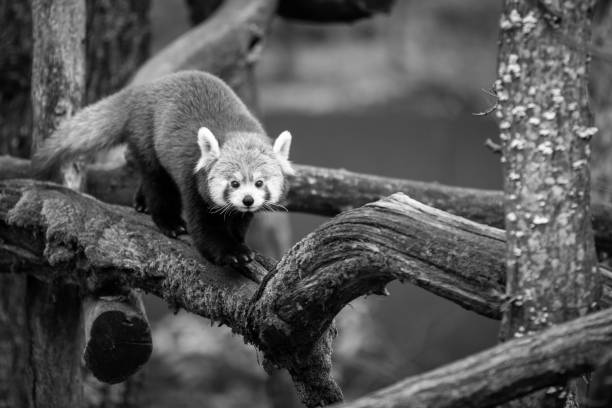

In [37]:
from google.colab import files
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

# Prześlij plik
uploaded = files.upload()

# Wybierz nazwę przesłanego pliku
file_name = 'panda.jpg'  # Nazwa  pliku

# Wczytaj obraz
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
# Sprawdź poprawność wczytania obrazu
if image is None:
    raise ValueError("Nie można wczytać obrazu.")
# Wyświetl obraz
cv2_imshow(image)


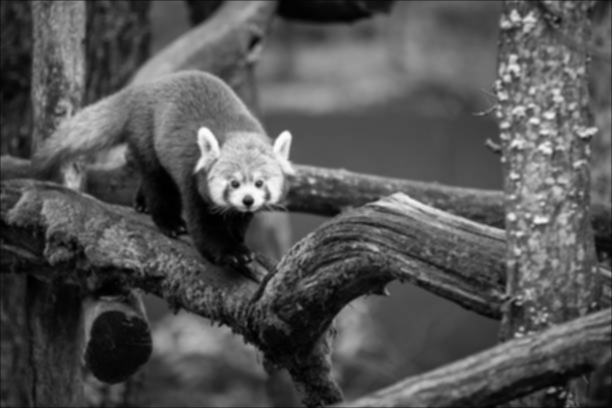

In [9]:
# Pomniejszenie obrazu za pomocą splotu z jądrem uśredniającym
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9

# Użycie convolve2d do pomniejszenia obrazu
smaller_image = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

# Wyświetl pomniejszony obraz
cv2_imshow(smaller_image)

In [10]:
# Funkcja interpolacji sin(x)
def interpolate_sin(x):
    return np.sin(x)

# Funkcja interpolacji f3(x) = sgn(sin(8x))
def interpolate_f3(x):
    return np.sign(np.sin(8 * x))


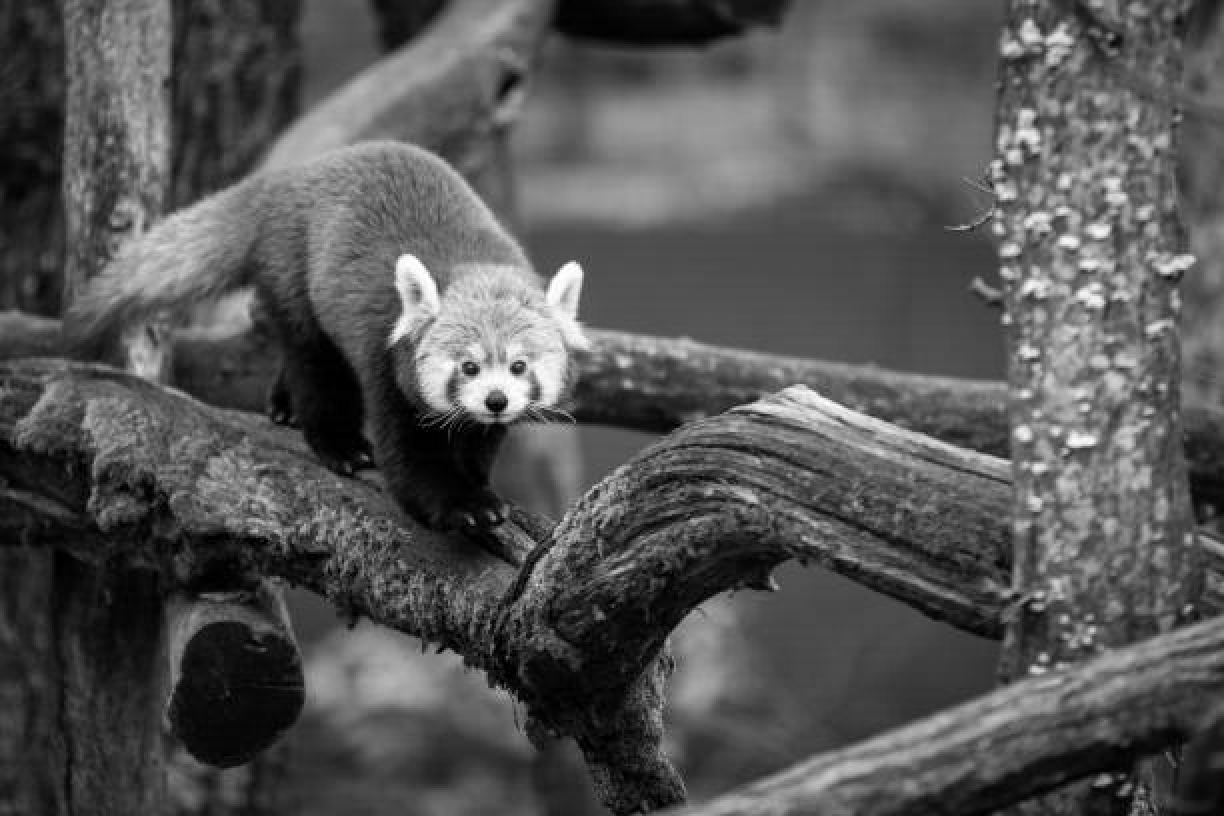

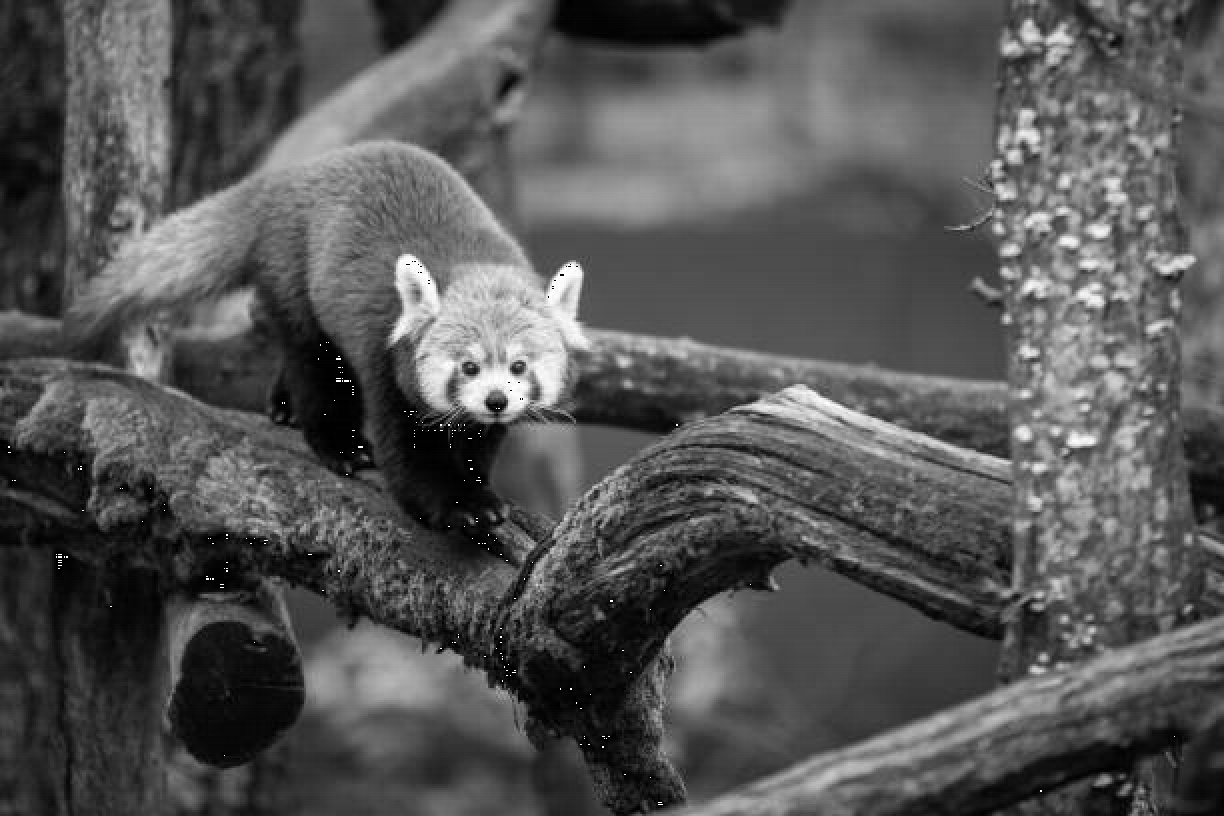

MSE1 (powiększony obraz sin(x)): 9476.460992566961
MSE2 (powiększony obraz f3(x) = sgn(sin(8x))): 9474.916758778674


In [40]:
# Wczytaj obraz
image = cv2.imread("panda.jpg", cv2.IMREAD_GRAYSCALE)

# Współczynnik powiększenia
scale_factor = 2

# Obliczanie nowych wymiarów obrazu
new_height, new_width = int(image.shape[0] * scale_factor), int(image.shape[1] * scale_factor)

# Powiększanie obrazu manualnie za pomocą interpolacji dwuliniowej
enlarged_image1 = np.zeros((new_height, new_width), dtype=np.uint8)
enlarged_image2 = np.zeros((new_height, new_width), dtype=np.uint8)

# Funkcja interpolacji sin(x)
def interpolate_sin(x):
    return np.sin(x)

# Funkcja interpolacji f3(x) = sgn(sin(8x))
def interpolate_f3(x):
    return np.sign(np.sin(8 * x))

# Obliczanie MSE między oryginalnym obrazem a powiększonym obrazem
mse1, mse2 = 0, 0

for i in range(new_height):
    for j in range(new_width):
        x, y = i / scale_factor, j / scale_factor
        x1, y1 = int(x), int(y)
        tx, ty = x - x1, y - y1

        # Obliczanie wartości interpolacji
        interpolated_value1 = (1 - tx) * (1 - ty) * interpolate_sin(x) + tx * (1 - ty) * interpolate_sin(x + 1) + (1 - tx) * ty * interpolate_sin(y) + tx * ty * interpolate_sin(x + 1)
        interpolated_value2 = (1 - tx) * (1 - ty) * interpolate_f3(x) + tx * (1 - ty) * interpolate_f3(x + 1) + (1 - tx) * ty * interpolate_f3(y) + tx * ty * interpolate_f3(x + 1)

        # Ustawianie wartości piksela w obrazie powiększonym
        enlarged_image1[i, j] = int(image[x1, y1] + interpolated_value1)
        enlarged_image2[i, j] = int(image[x1, y1] + interpolated_value2)

        # Obliczanie MSE
        mse1 += (image[x1, y1] - int(interpolated_value1)) ** 2
        mse2 += (image[x1, y1] - int(interpolated_value2)) ** 2

# Normalizacja MSE
mse1 /= (new_height * new_width)
mse2 /= (new_height * new_width)

# Wyświetlanie obrazów i wartości MSE
cv2_imshow(enlarged_image1)
cv2_imshow(enlarged_image2)
print(f"MSE1 (powiększony obraz sin(x)): {mse1}")
print(f"MSE2 (powiększony obraz f3(x) = sgn(sin(8x))): {mse2}")

